In [1]:
# Import Necessary Packages
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime

In [2]:
# Import ML Necessary Packages and Evaluation Metrices
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, classification_report

# Escape Rate (Accepted): # of False Negatives / # of All Predictions
# Escape Rate is a classification application that incorrectly predicts a defective part as good
 
# Overkill Rate (Rejected): # of False Positives/ # of All Predictions
# Overkill Rate is a classification application that produces false positive predictions generates overkill, meaning good products or parts without defects are mistakenly removed from the production line.
# Reference Articel: https://www.researchgate.net/profile/Han-Liu-18/publication/348227223_Performance_Evaluation_of_Deep_Learning_Classification_Network_for_Image_Features/links/6063d655299bf173677dca56/Performance-Evaluation-of-Deep-Learning-Classification-Network-for-Image-Features.pdf?origin=publication_detail

In [3]:
# Import Tensorflow Packages
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import Input, datasets, layers, models

# Install the dataset: CIFAR-10
from tensorflow.keras.datasets import cifar10

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.constraints import maxnorm

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
from tensorflow.keras.layers import ReLU,add, LeakyReLU
from keras.layers import MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D, MaxPool2D, Flatten, BatchNormalization
from keras.layers import Dropout, Add, Concatenate
from keras.layers import LSTM

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler

!pip install pydot
!pip install graphviz
!pip install pydotplus

import pydot
import graphviz
import pydotplus

# You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.

# Explaining the Package:
# Sequential Model is a linear stack of layers. A sequential model is appropriate for plain stack of layers where each layer has exactly one input tensor and one output tensor.
# Dense layer is the regular connected neural network layer. It is most common and freqiently used layer. 
# EarlyStopping is crucial mainly because it stop training the model when a monitored metric has stopped improving.
# Keras layer consist of a tensor-in tensor-out computation function, A layer instance is callable.
# Keras optimizer is used to change the attributes of the model, including the weighting, the learning rate to minimize the losses.
# Keras regularizer allow us to apply penalties ib layer parameter/ layer activity during optimization.
# Keras callback is an object that to perform actions at various stage of training. Callback can be used to write tensorboard logs after eevry batch of training/ monitor your metrics

In [4]:
# Import Image Processing Packages, Pillow and OpenCV
!pip install Pillow
!pip3 install opencv-python
from PIL import Image
import cv2
# Reference: https://medium.com/@danielpaz601/how-to-crack-a-real-captcha-image-using-deep-learning-338c757272e0
# Reference: https://www.delftstack.com/howto/python/python-display-image/

# Matplotlib Packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
# Reference: https://matplotlib.org/stable/tutorials/introductory/images.html

# Import skimage from scikit-learn
from skimage import io
from skimage import filters
# io mdodule is used to read and write images in various formats.
# filters modeule is used to read the filter the features of the images

In [5]:
# Import and Read the Dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
cifar_10 = cifar10.load_data()

In [6]:
# Check the dataset size
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


C:\Users\willi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\willi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


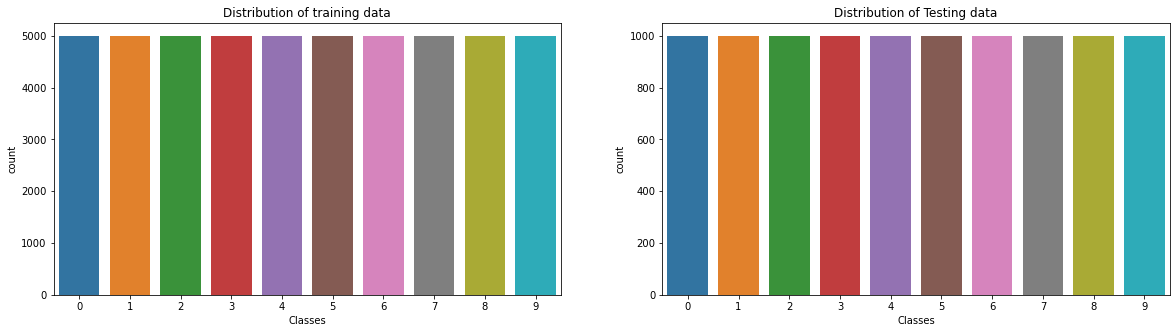

In [7]:
# Find the unique value and plot it
fig, axs = plt.subplots(1,2,figsize=(20,5)) 

# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')

# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')

plt.show()

In [8]:
# Check the dimensionality of the y_train data
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [9]:
# Change the dimensional array from 2 to 1
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

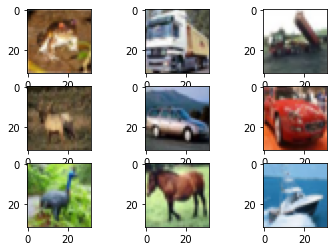

In [10]:
# Call numbers of images
img_rows, img_cols , channels= 32,32,3
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [11]:
# Understand that CIFAR-10 dataset consist of 10 different data
# Assign the name of the data
classes=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [12]:
# Keras provides numpy utility library, which provides functions to perform actions on numpy arrays.

# from keras.utils import np_utils
# Change the data type and normalize the dataset
# Explain why 255, not 256?
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the mean and standard deviation
mu= np.mean(x_train)
std= np.std(x_train)

# Normalize the data by using X-mu/SD
x_train= (x_train-mu)/std
x_test= (x_test-mu)/std

# Convert the class vectors into binary class
num_classes= 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test= tf.keras.utils.to_categorical(y_test, num_classes)

In [13]:
# Modify Data Augmentation: Data Augmentation tune with Brightness
imgdatagen = ImageDataGenerator(
    rotation_range= 15,
    horizontal_flip= True,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    brightness_range= [1.0, 1.5]
    )
imgdatagen.fit(x_train)

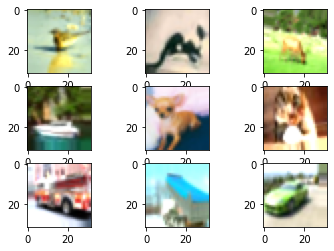

In [14]:
for x_batch, y_batch in imgdatagen.flow(x_train, y_train, batch_size= 10):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].astype(np.uint8))
    plt.show()
    break

In [15]:
# Reshape the dataset
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [16]:
# Build a Model with data augmentation with epochs= 30
reg= None
num_filters= 32
ac= 'relu'
adm= Adam(learning_rate= 0.001, decay= 0, beta_1= 0.9, beta_2= 0.999, epsilon= 1e-08)
opt= adm
drop_dense= 0.5
drop_conv =0

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, input_shape= (img_rows, img_cols, channels), padding= 'same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, padding= 'same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation= ac, kernel_regularizer= reg,padding= 'same'))
model.add(BatchNormalization(axis= -1))
model.add(Conv2D(2*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model.add(BatchNormalization(axis= -1))
model.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model.add(BatchNormalization(axis =-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation= ac,kernel_regularizer= reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation= 'softmax'))

model.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= opt)

In [17]:
# Train the model with data augmentation with epochs= 30
history= model.fit_generator(imgdatagen.flow(x_train, y_train, batch_size= 128), steps_per_epoch= len(x_train)/128, epochs= 30, validation_data=(x_test, y_test))

<ipython-input-17-85ffb88ec110>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(imgdatagen.flow(x_train, y_train, batch_size= 128), steps_per_epoch= len(x_train)/128, epochs= 30, validation_data=(x_test, y_test))


Epoch 1/30
390/390 [==============================] - 112s 284ms/step - loss: 1.6381 - accuracy: 0.4660 - val_loss: 4.5533 - val_accuracy: 0.1135
Epoch 2/30
390/390 [==============================] - 111s 283ms/step - loss: 1.0828 - accuracy: 0.6196 - val_loss: 6.0019 - val_accuracy: 0.1461
Epoch 3/30
390/390 [==============================] - 110s 281ms/step - loss: 0.8951 - accuracy: 0.6861 - val_loss: 7.2649 - val_accuracy: 0.1566
Epoch 4/30
390/390 [==============================] - 111s 284ms/step - loss: 0.7990 - accuracy: 0.7197 - val_loss: 5.2353 - val_accuracy: 0.1021
Epoch 5/30
390/390 [==============================] - 110s 281ms/step - loss: 0.7337 - accuracy: 0.7442 - val_loss: 4.7402 - val_accuracy: 0.1155
Epoch 6/30
390/390 [==============================] - 111s 284ms/step - loss: 0.6890 - accuracy: 0.7612 - val_loss: 5.5780 - val_accuracy: 0.1624
Epoch 7/30
390/390 [==============================] - 110s 282ms/step - loss: 0.6562 - accuracy: 0.7742 - val_loss: 6.1065 -

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 9.5467 - accuracy: 0.1240


[9.546728134155273, 0.12399999797344208]

In [19]:
# Print the accuracy without dropout applied
train_acc= model.evaluate(x_train, y_train, batch_size=128)
train_acc

391/391 [==============================] - 25s 65ms/step - loss: 9.6617 - accuracy: 0.1214


[9.661718368530273, 0.1214200034737587]

In [20]:
# Print the accuracy without dropout applied
test_acc= model.evaluate(x_test, y_test, batch_size=128)
test_acc

79/79 [==============================] - 5s 67ms/step - loss: 9.5467 - accuracy: 0.1240


[9.546727180480957, 0.12399999797344208]

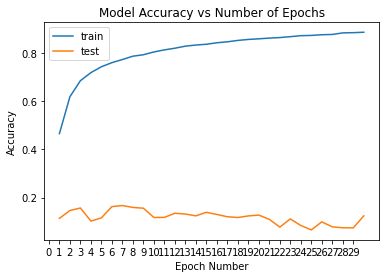

In [23]:
# Plot the accuracy result
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 30, 1))
plt.show()

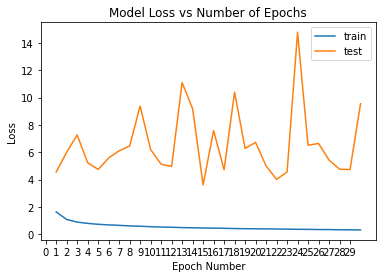

In [25]:
# Plot the loss result
plt.plot(range(1,1+len(history.history['loss'])), history.history['loss'])
plt.plot(range(1,1+len(history.history['val_loss'])), history.history['val_loss'])
plt.title('Model Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 30, 1))
plt.show()

In [26]:
# Print the best test accuracy to the value of epochs
best_score = max(history.history['val_accuracy'])
best_epoch = np.array(history.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.166700 at epoch 7


In [ ]:
# Conclusion: Brightness parameter tuning is not suitable to be used with the dataset

In [27]:
# Model 2 tune only with zoom range
imgdatagen2 = ImageDataGenerator(
    rotation_range= 15,
    horizontal_flip= True,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    zoom_range= 0.3
    )
imgdatagen2.fit(x_train)

In [28]:
# Model 2 with epochs of 30 
reg= None
num_filters= 32
ac= 'relu'
adm= Adam(learning_rate= 0.001, decay= 0, beta_1= 0.9, beta_2= 0.999, epsilon= 1e-08)
opt= adm
drop_dense= 0.5
drop_conv= 0

model2 = Sequential()

model2.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, input_shape= (img_rows, img_cols, channels), padding= 'same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, padding= 'same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   
model2.add(Dropout(drop_conv))

model2.add(Conv2D(2*num_filters, (3, 3), activation= ac, kernel_regularizer= reg,padding= 'same'))
model2.add(BatchNormalization(axis= -1))
model2.add(Conv2D(2*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   
model2.add(Dropout(drop_conv))

model2.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model2.add(BatchNormalization(axis= -1))
model2.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model2.add(BatchNormalization(axis =-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   
model2.add(Dropout(drop_conv))

model2.add(Flatten())
model2.add(Dense(512, activation= ac,kernel_regularizer= reg))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense))
model2.add(Dense(num_classes, activation= 'softmax'))

model2.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= opt)

In [29]:
# Train the model with data augmentation
history2=model2.fit_generator(imgdatagen2.flow(x_train, y_train, batch_size= 128), steps_per_epoch= len(x_train)/128, epochs= 30, validation_data=(x_test, y_test))

Epoch 1/30


<ipython-input-29-e69850953d09>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model2.fit_generator(imgdatagen2.flow(x_train, y_train, batch_size= 128), steps_per_epoch= len(x_train)/128, epochs= 30, validation_data=(x_test, y_test))


390/390 [==============================] - 123s 313ms/step - loss: 1.7279 - accuracy: 0.4300 - val_loss: 1.1278 - val_accuracy: 0.6009
Epoch 2/30
390/390 [==============================] - 121s 311ms/step - loss: 1.1670 - accuracy: 0.5863 - val_loss: 1.0114 - val_accuracy: 0.6562
Epoch 3/30
390/390 [==============================] - 138s 353ms/step - loss: 0.9791 - accuracy: 0.6545 - val_loss: 0.9708 - val_accuracy: 0.6772
Epoch 4/30
390/390 [==============================] - 134s 342ms/step - loss: 0.8728 - accuracy: 0.6927 - val_loss: 0.7876 - val_accuracy: 0.7398
Epoch 5/30
390/390 [==============================] - 134s 343ms/step - loss: 0.8064 - accuracy: 0.7171 - val_loss: 0.7332 - val_accuracy: 0.7559
Epoch 6/30
390/390 [==============================] - 129s 331ms/step - loss: 0.7514 - accuracy: 0.7388 - val_loss: 0.6818 - val_accuracy: 0.7681
Epoch 7/30
390/390 [==============================] - 130s 332ms/step - loss: 0.7072 - accuracy: 0.7530 - val_loss: 0.6384 - val_accura

In [30]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 8s 27ms/step - loss: 0.4249 - accuracy: 0.8648


[0.4248744249343872, 0.864799976348877]

In [31]:
# Print the accuracy with dropout applied
train_acc2= model2.evaluate(x_train, y_train, batch_size=128)
train_acc2

391/391 [==============================] - 25s 64ms/step - loss: 0.2601 - accuracy: 0.9097


[0.2600807249546051, 0.9096999764442444]

In [32]:
# Print the accuracy without dropout applied
test_acc2= model2.evaluate(x_test, y_test, batch_size=128)
test_acc2

79/79 [==============================] - 5s 58ms/step - loss: 0.4249 - accuracy: 0.8648


[0.42487451434135437, 0.864799976348877]

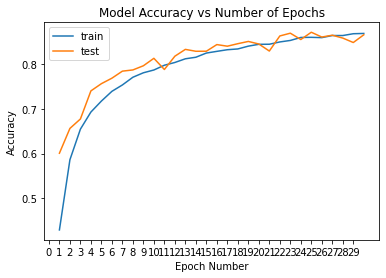

In [33]:
# Plot the accuracy result
plt.plot(range(1,1+len(history2.history['accuracy'])), history2.history['accuracy'])
plt.plot(range(1,1+len(history2.history['val_accuracy'])), history2.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 30, 1))
plt.show()

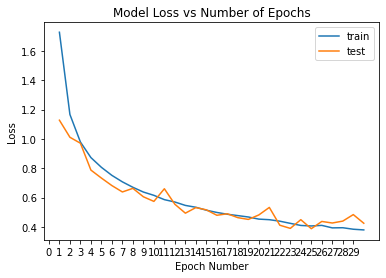

In [34]:
# Plot the loss result
plt.plot(range(1,1+len(history2.history['loss'])), history2.history['loss'])
plt.plot(range(1,1+len(history2.history['val_loss'])), history2.history['val_loss'])
plt.title('Model Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 30, 1))
plt.show()

In [35]:
# Print the best test accuracy to the value of epochs
best_score = max(history2.history['val_accuracy'])
best_epoch = np.array(history2.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.870500 at epoch 25


In [36]:
# Model 3 with modified dataimagegenerator tune with rotation range
imgdatagen3 = ImageDataGenerator(
    rotation_range= 20,
    horizontal_flip= True,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    zoom_range= 0.3
    )
imgdatagen3.fit(x_train)

In [37]:
# Model 3 with epochs of 30
reg= None
num_filters= 32
ac= 'relu'
adm= Adam(learning_rate= 0.001, decay= 0, beta_1= 0.9, beta_2= 0.999, epsilon= 1e-08)
opt= adm
drop_dense= 0.5
drop_conv= 0

model3 = Sequential()

model3.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, input_shape= (img_rows, img_cols, channels), padding= 'same'))
model3.add(BatchNormalization(axis=-1))
model3.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, padding= 'same'))
model3.add(BatchNormalization(axis=-1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(drop_conv))

model3.add(Conv2D(2*num_filters, (3, 3), activation= ac, kernel_regularizer= reg,padding= 'same'))
model3.add(BatchNormalization(axis= -1))
model3.add(Conv2D(2*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model3.add(BatchNormalization(axis=-1))
model3.add(MaxPooling2D(pool_size=(2, 2))) 
model3.add(Dropout(drop_conv))

model3.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model3.add(BatchNormalization(axis= -1))
model3.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model3.add(BatchNormalization(axis =-1))
model3.add(MaxPooling2D(pool_size=(2, 2)))  
model3.add(Dropout(drop_conv))

model3.add(Flatten())
model3.add(Dense(512, activation= ac,kernel_regularizer= reg))
model3.add(BatchNormalization())
model3.add(Dropout(drop_dense))
model3.add(Dense(num_classes, activation= 'softmax'))

model3.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= opt)

In [38]:
# Train the model with data augmentation
history3=model3.fit(imgdatagen3.flow(x_train, y_train, batch_size= 128), steps_per_epoch= len(x_train)/128, epochs= 30, validation_data=(x_test, y_test))

Epoch 1/30
390/390 [==============================] - 133s 338ms/step - loss: 1.7498 - accuracy: 0.4255 - val_loss: 1.1918 - val_accuracy: 0.5763
Epoch 2/30
390/390 [==============================] - 138s 352ms/step - loss: 1.2045 - accuracy: 0.5730 - val_loss: 1.0580 - val_accuracy: 0.6455
Epoch 3/30
390/390 [==============================] - 106s 272ms/step - loss: 1.0161 - accuracy: 0.6433 - val_loss: 0.9468 - val_accuracy: 0.6764
Epoch 4/30
390/390 [==============================] - 118s 301ms/step - loss: 0.9176 - accuracy: 0.6771 - val_loss: 0.9937 - val_accuracy: 0.6817
Epoch 5/30
390/390 [==============================] - 110s 280ms/step - loss: 0.8520 - accuracy: 0.7013 - val_loss: 0.7472 - val_accuracy: 0.7481
Epoch 6/30
390/390 [==============================] - 129s 330ms/step - loss: 0.7832 - accuracy: 0.7269 - val_loss: 0.6029 - val_accuracy: 0.7903
Epoch 7/30
390/390 [==============================] - 145s 370ms/step - loss: 0.7340 - accuracy: 0.7442 - val_loss: 0.6402 -

In [39]:
# Print the accuracy with dropout applied
train_acc3= model3.evaluate(x_train, y_train, batch_size=128)
train_acc3

391/391 [==============================] - 24s 60ms/step - loss: 0.2870 - accuracy: 0.9021


[0.28698334097862244, 0.9021000266075134]

In [40]:
# Print the accuracy without dropout applied
test_acc3= model3.evaluate(x_test, y_test, batch_size=128)
test_acc3

79/79 [==============================] - 5s 61ms/step - loss: 0.4315 - accuracy: 0.8602


[0.4314669370651245, 0.8601999878883362]

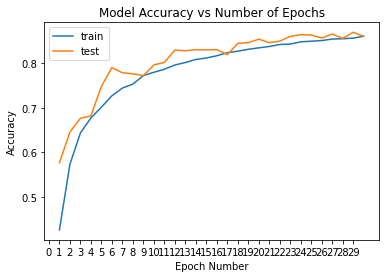

In [41]:
# Plot the accuracy result
plt.plot(range(1,1+len(history3.history['accuracy'])), history3.history['accuracy'])
plt.plot(range(1,1+len(history3.history['val_accuracy'])), history3.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 30, 1))
plt.show()

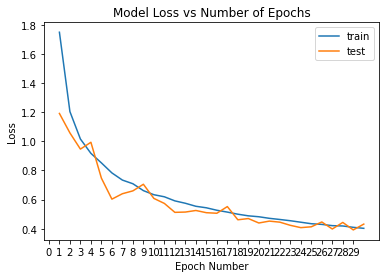

In [42]:
# Plot the loss result
plt.plot(range(1,1+len(history3.history['loss'])), history3.history['loss'])
plt.plot(range(1,1+len(history3.history['val_loss'])), history3.history['val_loss'])
plt.title('Model Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 30, 1))
plt.show()

In [43]:
# Print the best test accuracy to the value of epochs
best_score = max(history3.history['val_accuracy'])
best_epoch = np.array(history3.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.869700 at epoch 29


In [44]:
# Model 4 tune with different zoom range
imgdatagen4 = ImageDataGenerator(
    rotation_range= 20,
    horizontal_flip= True,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    zoom_range= 0.5
    )
imgdatagen4.fit(x_train)

In [45]:
# Model 4 with 30 epochs
reg= None
num_filters= 32
ac= 'relu'
adm= Adam(learning_rate= 0.001, decay= 0, beta_1= 0.9, beta_2= 0.999, epsilon= 1e-08)
opt= adm
drop_dense= 0.5
drop_conv= 0

model4 = Sequential()

model4.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, input_shape= (img_rows, img_cols, channels), padding= 'same'))
model4.add(BatchNormalization(axis=-1))
model4.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, padding= 'same'))
model4.add(BatchNormalization(axis=-1))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(drop_conv))

model4.add(Conv2D(2*num_filters, (3, 3), activation= ac, kernel_regularizer= reg,padding= 'same'))
model4.add(BatchNormalization(axis= -1))
model4.add(Conv2D(2*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model4.add(BatchNormalization(axis=-1))
model4.add(MaxPooling2D(pool_size=(2, 2))) 
model4.add(Dropout(drop_conv))

model4.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model4.add(BatchNormalization(axis= -1))
model4.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model4.add(BatchNormalization(axis =-1))
model4.add(MaxPooling2D(pool_size=(2, 2)))  
model4.add(Dropout(drop_conv))

model4.add(Flatten())
model4.add(Dense(512, activation= ac,kernel_regularizer= reg))
model4.add(BatchNormalization())
model4.add(Dropout(drop_dense))
model4.add(Dense(num_classes, activation= 'softmax'))

model4.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= opt)

In [46]:
# Train the model with data augmentation
history4=model4.fit(imgdatagen4.flow(x_train, y_train, batch_size= 128), steps_per_epoch= len(x_train)/128, epochs= 30, validation_data=(x_test, y_test))

Epoch 1/30
390/390 [==============================] - 109s 277ms/step - loss: 1.8872 - accuracy: 0.3886 - val_loss: 1.2542 - val_accuracy: 0.5489
Epoch 2/30
390/390 [==============================] - 109s 279ms/step - loss: 1.4001 - accuracy: 0.5079 - val_loss: 1.1583 - val_accuracy: 0.6045
Epoch 3/30
390/390 [==============================] - 110s 282ms/step - loss: 1.2010 - accuracy: 0.5752 - val_loss: 1.0960 - val_accuracy: 0.6284
Epoch 4/30
390/390 [==============================] - 109s 278ms/step - loss: 1.0848 - accuracy: 0.6184 - val_loss: 0.8420 - val_accuracy: 0.7147
Epoch 5/30
390/390 [==============================] - 108s 278ms/step - loss: 1.0052 - accuracy: 0.6476 - val_loss: 0.8223 - val_accuracy: 0.7174
Epoch 6/30
390/390 [==============================] - 109s 279ms/step - loss: 0.9423 - accuracy: 0.6703 - val_loss: 0.6893 - val_accuracy: 0.7619
Epoch 7/30
390/390 [==============================] - 111s 283ms/step - loss: 0.8871 - accuracy: 0.6908 - val_loss: 0.7174 -

In [47]:
# Print the accuracy with dropout applied
train_acc4= model4.evaluate(x_train, y_train, batch_size=128)
train_acc4

391/391 [==============================] - 24s 61ms/step - loss: 0.3090 - accuracy: 0.8934


[0.3090182840824127, 0.8934400081634521]

In [48]:
# Print the accuracy without dropout applied
test_acc4= model4.evaluate(x_test, y_test, batch_size=128)
test_acc4

79/79 [==============================] - 5s 63ms/step - loss: 0.4295 - accuracy: 0.8594


[0.4294698238372803, 0.8593999743461609]

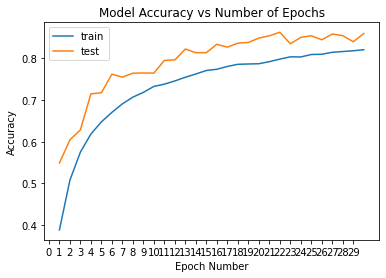

In [49]:
# Plot the accuracy result
plt.plot(range(1,1+len(history4.history['accuracy'])), history4.history['accuracy'])
plt.plot(range(1,1+len(history4.history['val_accuracy'])), history4.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 30, 1))
plt.show()

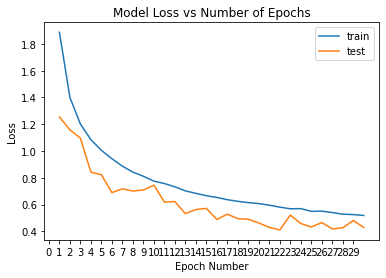

In [50]:
# Plot the loss result
plt.plot(range(1,1+len(history4.history['loss'])), history4.history['loss'])
plt.plot(range(1,1+len(history4.history['val_loss'])), history4.history['val_loss'])
plt.title('Model Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 30, 1))
plt.show()

In [51]:
# Print the best test accuracy to the value of epochs
best_score = max(history4.history['val_accuracy'])
best_epoch = np.array(history4.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.862400 at epoch 22


In [52]:
# Apply RESNET-50
# RESNET50: https://www.kaggle.com/code/kutaykutlu/resnet50-transfer-learning-cifar-10-beginner/notebook

In [ ]:
# Execute with autoencoder
# https://medium.com/mlearning-ai/image-deblurring-using-convolutional-autoencoders-deep-learning-project-tutorial-329f87a4c6ad